<h1><b>Ο Αλγόριθμος k-means</b></h1>
<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο μη επιβλεπόμενης μάθησης <a href="https://en.wikipedia.org/wiki/K-means_clustering"><i>k-means</i></a>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Για την παρούσα άσκηση θα χρησιμοποιήσετε τη βιβλιοθήκη <i>Scikit-Learn</i> της <i>Python</i>. Συγκεκριμένα, θα διαχωρίσετε σε <i>συστάδες (clusters)</i> 150 παραδείγματα του φυτού <i>Ίρις</i> με βάση το unlabeled dataset που σας δίνεται στο τέλος της εκφώνησης και με βάση αυτό μπορείτε να χτίσετε και το ενιαίο πρόγραμμα που θα σας ζητηθεί. Τα <i>χαρακτηριστικά (features)</i> που περιλαμβάνονται στο <i>dataset</i> και που περιγράφουν το κάθε παράδειγμα είναι τα εξής: το <i>μήκος του Σέπαλου (sepal length)</i>, το <i>πλάτος του Σέπαλου (sepal width)</i>, το <i>μήκος των Πετάλων (petal length)</i> και το <i>πλάτος των Πετάλων (petal width)</i>.</p>
<p>Καλείστε να αναπτύξετε ένα ενιαίο πρόγραμμα που να κάνει τα παρακάτω:</p>
<ul>
<li>Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο δείγμα του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε έναν επαρκή αριθμό <i>συστάδων</i>. Τι παρατηρείτε;</li>
<li>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση τον αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πώς λειτουργεί ο αλγόριθμος.</li>
<li>Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου
(<i>Ακρίβειας – Accuracy</i>, <a href="https://en.wikipedia.org/wiki/Confusion_matrix"><i>Τιμές Μήτρας Λαθών – Error Matrix</i></a>).</li>
</ul>

In [85]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as scikitmetrics
import seaborn as sns
    
import pandas as pd
import numpy as np

In [86]:
# import some data to play with (from sklearn)
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [87]:
#print is optional
print(iris.data)
iris.feature_names
print(iris.target)
iris.target_names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [88]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [89]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

In [90]:
x.head(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [91]:
y.head(5)

,Targets
0,0
1,0
2,0
3,0
4,0


## Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο δείγμα του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε έναν επαρκή αριθμό <i>συστάδων</i>. Τι παρατηρείτε;

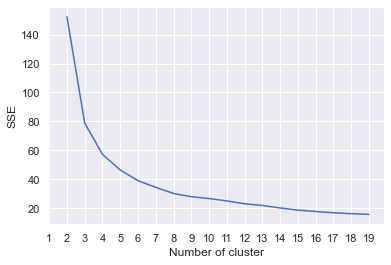

In [181]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.xticks(ticks=list(range(1,20)))
plt.grid(visible=True)
plt.ylabel("SSE")
plt.show()

Με βάση το SSE (Sum of squared errors) και το elbow method, επιλέγουμε ως βέλτιστο αριθμό clusters τα 3. Ωστόσο και το 4 φαίνεται καλή τιμή.

Παρατηρούμε ότι όσο αυξάνει ο αριθμός των clusters το άθροισμα των squared errors (SSE) μειώνεται, ωστόσο η μείωση αυτή, ενώ είναι αισθητή στην αρχή, στη συνέχεια ελαττώνεται και επομένως η αύξηση του αριθμού των συστάδων έχει μικρό αποτέλεσμα στην περαιτέρω μείωση του SSE. Έτσι, στο γόνατο ή elbow της καμπύλης θεωρούμε ότι οι τιμές του αριθμού των clusters είναι ικανοποιητικές για να συσταδοποιήσουμε τα δεδομένα.

## <i>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση τον αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πώς λειτουργεί ο αλγόριθμος.</i>

Θσ υλοποιήσουμε τον K-means για k=3 με βάση το προηγούμενο ερώτημα.

In [102]:
k = 3

kmeans_k3 = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(x)
sse = kmeans_k3.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

print(f'SSE for k={k} is : {sse}')

SSE for k=3 is : 78.85144142614601


In [103]:
kmeans_k3.__dict__.keys()

dict_keys(['n_clusters', 'init', 'max_iter', 'tol', 'n_init', 'verbose', 'random_state', 'copy_x', 'algorithm', 'feature_names_in_', 'n_features_in_', '_n_init', '_tol', '_algorithm', '_n_threads', 'cluster_centers_', 'labels_', 'inertia_', 'n_iter_'])

In [104]:
n_clusters = kmeans_k3.n_clusters
clusters_centers = kmeans_k3.cluster_centers_
print(f'The number of clusters = {n_clusters}\nThe centers of the clusters are:\n{clusters_centers}\nData points assigned to clusters:\n{kmeans_k3.labels_}')

The number of clusters = 3
The centers of the clusters are:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Data points assigned to clusters:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Ο αλγόριθµος k-means εκτελεί τα εξής βήµατα:

1. Τυχαία αρχικοποίηση k σημείων (centroids - κέντρα), καθένα εκ των οποίων αντιπροσωπεύει μια συστάδα.
2. Ανάθεση κάθε δειγματικού στοιχείου εκπαίδευσης στη συστάδα (centroid) µε το πιο κοντινό κέντρο.
3. Υπολογισµός νέου centroid κάθε συστάδας ως μέσο όρο των σημείων (δειγματικών στοιχείων) που έχουν ανατεθεί στη συστάδα.
4. Εκ νέου ανάθεση κάθε δειγματικού στοιχείου εκπαίδευσης στη συστάδα (centroid) με το πιο κοντινό κέντρο.
5. Τερματισμός όταν δεν υπάρχει νέα ανάθεση.

## Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου (Ακρίβειας – Accuracy, Τιμές Μήτρας Λαθών – Error Matrix).

In [105]:
predicted_cluster = kmeans_k3.labels_
true_cluster = iris.target

cluster_results_df = pd.DataFrame({'True cluster': true_cluster, 'Predicted cluster': predicted_cluster})
cluster_results_df

,True cluster,Predicted cluster
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
145,2,2
146,2,0
147,2,2
148,2,2


In [106]:
# map the clusters correctly
predicted_cluster_mapped = []
for i in range(len(cluster_results_df)):
    if cluster_results_df.loc[i, 'Predicted cluster'] == 1:
        predicted_cluster_mapped.append(0)
    elif cluster_results_df.loc[i, 'Predicted cluster'] == 0:
        predicted_cluster_mapped.append(1)
    else:
        predicted_cluster_mapped.append(2)

# add a new column to the dataframe with corrected (mapped) predicted cluster assignments
cluster_results_df['Predicted cluster mapped'] = predicted_cluster_mapped

# add a new column if clustering was correct (true == predicted mapped)
cluster_results_df['Correctly clustered'] = cluster_results_df['True cluster'] - cluster_results_df['Predicted cluster mapped']

clustering_correct = []
for i in range(len(cluster_results_df)):
    value = cluster_results_df.loc[i, 'Correctly clustered']
    if value == 0:
        clustering_correct.append(True)
    else:
        clustering_correct.append(False)

cluster_results_df['Correctly clustered'] = clustering_correct

# reassign the np array of predicted clusters for all data points with the adjusted/corrected/mapped series
predicted_cluster = np.array(cluster_results_df['Predicted cluster mapped'])

# print how many data points out of the 150 were wrongly clustered
print(f'{len(cluster_results_df) - cluster_results_df["Correctly clustered"].sum()} data points out of {len(cluster_results_df)} were wrongly clustered')

# show df
cluster_results_df

16 data points out of 150 were wrongly clustered


,True cluster,Predicted cluster,Predicted cluster mapped,Correctly clustered
0,0,1,0,True
1,0,1,0,True
2,0,1,0,True
3,0,1,0,True
4,0,1,0,True
...,...,...,...,...
145,2,2,2,True
146,2,0,1,False
147,2,2,2,True
148,2,2,2,True


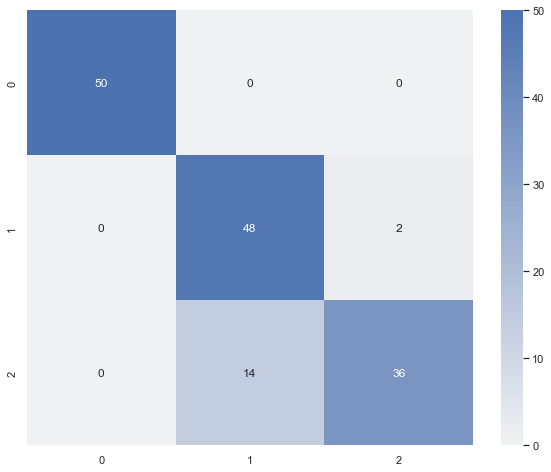

In [107]:
sns.set_theme()

conf_matrix = scikitmetrics.confusion_matrix(y_true=true_cluster, y_pred=predicted_cluster)
df_conf_matrix = pd.DataFrame(conf_matrix, index = [i for i in range(kmeans_k3.n_clusters)], columns = [i for i in range(kmeans_k3.n_clusters)])

fig, ax = plt.subplots(figsize = (10,8))
sns.heatmap(df_conf_matrix, annot=True, ax = ax, cmap = sns.color_palette("light:b", as_cmap=True))
plt.show()

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_true=true_cluster, y_pred=predicted_cluster, target_names=["Class 0", "Class 1", "Class 2"]))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        50
     Class 1       0.77      0.96      0.86        50
     Class 2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



In [120]:
# lets plot in 2 dimensions with two principal components

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)
print(f'Explained variance by the two PCA components are {pca.explained_variance_ratio_}, therefore the total explained variance is: {sum(pca.explained_variance_ratio_)}')

Explained variance by the two PCA components are [0.92461872 0.05306648], therefore the total explained variance is: 0.977685206318795


In [121]:
x_pca = pca.transform(x)
x_pca

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [130]:
# add pca components to df

cluster_results_df['PCA 1'] = x_pca[:, 0]
cluster_results_df['PCA 2'] = x_pca[:, 1]
cluster_results_df

,True cluster,Predicted cluster,Predicted cluster mapped,Correctly clustered,PCA 1,PCA 2
0,0,1,0,True,-2.684126,0.319397
1,0,1,0,True,-2.714142,-0.177001
2,0,1,0,True,-2.888991,-0.144949
3,0,1,0,True,-2.745343,-0.318299
4,0,1,0,True,-2.728717,0.326755
...,...,...,...,...,...,...
145,2,2,2,True,1.944110,0.187532
146,2,0,1,False,1.527167,-0.375317
147,2,2,2,True,1.764346,0.078859
148,2,2,2,True,1.900942,0.116628


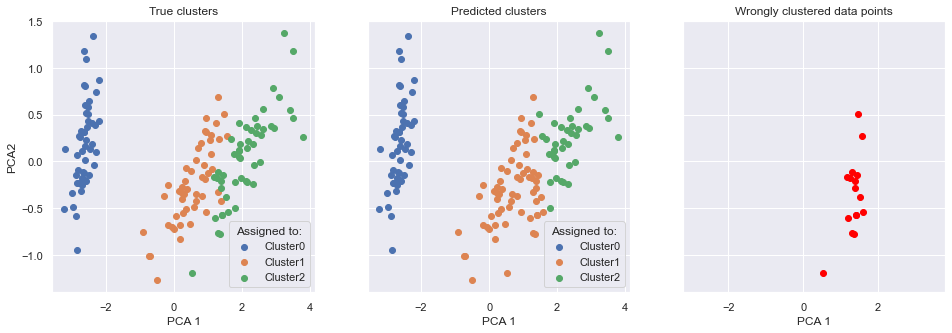

In [177]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), sharey=True)

for i in range(k):
    sub_df_true = cluster_results_df[cluster_results_df['True cluster'] == i]
    ax[0].scatter(sub_df_true['PCA 1'], sub_df_true['PCA 2'], cmap=i, label=f'Cluster{i}')

    sub_df_predicted = cluster_results_df[cluster_results_df['Predicted cluster mapped'] == i]
    ax[1].scatter(sub_df_predicted['PCA 1'], sub_df_predicted['PCA 2'], cmap=i, label=f'Cluster{i}')

sub_df_predicted_wrong = cluster_results_df[cluster_results_df['Correctly clustered'] == False]
ax[2].scatter(sub_df_predicted_wrong['PCA 1'], sub_df_predicted_wrong['PCA 2'], c='red')
ax[2].set_xlim(cluster_results_df['PCA 1'].min(), cluster_results_df['PCA 1'].max()) #use same x axis

ax[0].set(title='True clusters', xlabel='PCA 1', ylabel='PCA2') #y axis is shared
ax[1].set(title='Predicted clusters', xlabel='PCA 1')
ax[2].set(title='Wrongly clustered data points', xlabel='PCA 1')

ax[0].legend(title='Assigned to:')
ax[1].legend(title='Assigned to:')

plt.show()

Προηγουμένως, βρέθηκαν οι 2 κύριες συνιστώσες ώστε να μπορούσουμε να οπτικοποιήσουμε στις 2 διαστάσεις τα δεδομένα.

Παρατηρούμε με βάση όλα τα παραπάνω ότι για k=3 clusters, 16 δειγματικά στοιχεία από τα 150, ανατίθενται σε λάθος κλάση. Όπως φαίνεται και από το confusion matrix, αλλά και από τα προηγούμενα διαγράμματα, τα στοιχεία του cluster 1 και cluster 2 έχουν σύνορο αρκετά δυσδιάκριτο, με αποτέλεσμα όλα τα εσφαλμένως assigned δειγματικά στοιχεία να αφορούν τα δύο αυτά clusters αποκλειστικά (φαίνεται στο 3ο διάγραμμα παραπάνω αυτό αλλά και στο confusion matrix).

Τα 14 εκ των 16 mispredicted data points γίνονται predicted πως ανήκουν στο cluster1 με βάση τα 4 χαρακτηριστικά (features) τους, ενώ πραγματικά ανήκουν στην κλάση 2 (με βάση τα labels που έχουν δοθεί στο dataset και αφορούν το πραγματικό cluster καθενός δειγματικού στοιχείου), ενώ τα υπόλοιπα 2 εκ των 16 έχουν predicted cluster: cluster2 και actual cluster: cluster1.

Τέλος από το classification report φαίνεται πως για το cluster0, όντως έχουμε τέλειο clustering χωρίς λανθασμένα ταξινομημένα δειγματικά στοιχεία, αφού το precision και recall είναι 1.
Αντίθετα το precision για το cluster1 είναι 0.77 και recal 0.96 ενώ για το cluster2 είναι 0.95 και 0.72 αντιστοίχως.

Οι τιμές αυτές είναι αναμενόμενες, αφού $precision = TP / (TP + FP)$ και άρα λόγου χάρη για το cluster1 που προβλέπονται $TP+FP=48+14=62$ data points ως positive, μόνο τα $TP=48$ εξ αυτών προβλέφθηκαν σωστά, τουτέστιν $precision=TP/(TP+FP)=48/62=0.77$.

To cluster2 από την άλλη, έχει μικρό recall καθώς αρκετά (14/50) από τα δειγματικά στοιχεία που πραγματικά ανήκουν στο cluster αυτό (cluster2), ανατίθενται με βάση τα χαρακτηριστικά τους στο cluster1.

Οι παρακάτω ορισμοί είναι από τη βιβλιοθήκη sklearn:

- The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- The recall is  intuitively the ability of the classifier to find all the positive samples.
- The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.
- Also, in the classification report, the reported averages include macro average (averaging the unweighted  mean per label), weighted average (averaging the support-weighted mean per label), and sample average (only for multilabel classification).